In [18]:
%cd /content/drive/MyDrive/Autograd from scratch

import simplegrad.nn
import simplegrad.optim
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

/content/drive/MyDrive/Autograd from scratch


In [19]:
def one_hot(y, num_classes):
    mapping = dict()
    for i in range(num_classes):
        mapping[i] = [0] * num_classes
        mapping[i][i] = 1
    res = [mapping[yi] for yi in y]
    return res

In [14]:
digits = datasets.load_digits()
x = digits['data'] / 16
y = digits['target']
y = one_hot(y, num_classes=10)

model = simplegrad.nn.Sequential(
                    simplegrad.nn.Linear(64, 80),
                    simplegrad.nn.ReLU(0.1),
                    simplegrad.nn.Linear(80, 40),
                    simplegrad.nn.ReLU(0.1),
                    simplegrad.nn.Linear(40, 10),
                    simplegrad.nn.Softmax()
                   )
optimizer = simplegrad.optim.SGD(model.parameters(), 0.1)
loss = simplegrad.nn.CrossEntropyLoss()




Epoch:: 100%|██████████| 100/100 [01:06<00:00,  1.51it/s]


training loss: 0.340855313394544


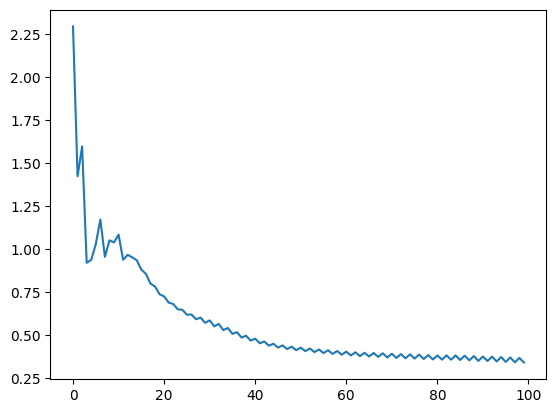

In [23]:
iris = datasets.load_iris()
x = iris['data']
y = iris['target']
y = one_hot(y, num_classes=3)

model = simplegrad.nn.Sequential(
                    simplegrad.nn.Linear(4, 8),
                    simplegrad.nn.ReLU(0.1),
                    simplegrad.nn.Linear(8, 4),
                    simplegrad.nn.ReLU(0.1),
                    simplegrad.nn.Linear(4, 3),
                    simplegrad.nn.Softmax()
                   )
optimizer = simplegrad.optim.SGD(model.parameters(), 0.05)
loss = simplegrad.nn.CrossEntropyLoss()


loss_hist = []
for epoch in tqdm.tqdm(range(100), desc='Epoch:'):

    output = [model(i) for i in x]
    l = loss(y, output)

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    loss_hist.append(l.value)
print(f'\ntraining loss: {l.value}')

plt.plot(loss_hist)